In [1]:
# python -m pip install prophet
# here i will try prophet on the loged data so log(x)

In [1]:
import numpy as np
import pandas as pd
import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import plotly.express as px
from datetime import datetime,date
from prophet import Prophet

%matplotlib inline
init_notebook_mode(connected=True)
cf.set_config_file(sharing='private',theme='pearl',offline=True)
#print("Cufflinks Version : {}".format(cf.__version__))

# facebook prophet requires the data to be in 2 colums named ds and y
# ds will be a datetime column with no timezone data and y the label we are forecasting
# ds must NOT be an index like other machine learning algorithms
dfBTCActual = pd.read_csv('./data/BTC-USD.csv')
dfBTC = pd.read_csv('./data/btc-usd-max latest.csv')
dfBTC.drop(["market_cap", "total_volume"], axis=1, inplace=True)
dfBTC['price'].fillna(method='ffill', inplace=True)
dfBTC.columns = ['ds','y']
# log data for btc
# dfBTC['y'] = np.log(dfBTC['y'])
# dfBTC['y'].iplot();
dynamic_days = 1550

C:\Users\sagap\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning:

A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)



In [2]:
# exp(log) = x so the orginal data  data for btc
#dfBTC['y'] = np.exp(dfBTC['y'])
dfBTC['y'].iplot();

In [3]:
# log data for btc
#dfBTC['y'] = np.log(dfBTC['y'])

In [4]:
dfBTC['ds'] = pd.to_datetime(dfBTC['ds'])
dfBTC['ds'] = dfBTC['ds'].dt.tz_localize(None)

In [5]:
dfBTC.head()

ds       y
0 2013-04-28  135.30
1 2013-04-29  141.96
2 2013-04-30  135.30
3 2013-05-01  117.00
4 2013-05-02  103.43

In [6]:
dfBTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3498 entries, 0 to 3497
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3498 non-null   datetime64[ns]
 1   y       3498 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 54.8 KB


In [7]:
train = dfBTC.iloc[:-dynamic_days]
test = dfBTC.iloc[-dynamic_days:]

In [8]:
# This is fitting only on the training data
m = Prophet(weekly_seasonality=False, seasonality_mode='multiplicative')
m.add_seasonality(name='4-year', period=1460, fourier_order=10)
m.fit(train)
# just a placeholder to hold our future predictions
# periods is how far in the future we want to predict and freq is the frequency of the data
# if we want monthly data then freq='MS'
future = m.make_future_dataframe(periods=dynamic_days,freq = 'D')

# to make predictions 
forecast = m.predict(future)

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [9]:
forecast

ds         trend    yhat_lower     yhat_upper   trend_lower  \
0    2013-04-28     35.623411   -384.819647     528.509429     35.623411   
1    2013-04-29     35.880972   -395.720929     517.990708     35.880972   
2    2013-04-30     36.138532   -363.812721     537.866010     36.138532   
3    2013-05-01     36.396093   -336.860713     550.562427     36.396093   
4    2013-05-02     36.653654   -382.599933     537.193016     36.653654   
...         ...           ...           ...            ...           ...   
3493 2022-11-22  18958.831579  56961.756427  102263.291406  13477.371120   
3494 2022-11-23  18967.781489  59180.425357  106349.462129  13479.577904   
3495 2022-11-24  18976.731399  61333.559155  110595.694782  13481.784688   
3496 2022-11-25  18985.681309  63569.527192  114575.062992  13483.991472   
3497 2022-11-26  18994.631219  66268.005886  119541.219246  13488.967364   

       trend_upper    4-year  4-year_lower  4-year_upper    daily  ...  \
0        35.623411 -1.854750     -1.854750     -1.854750  2.92246  ...   
1        35.880972 -1.841199     -1.841199     -1.841199  2.92246  ...   
2        36.138532 -1.826770     -1.826770     -1.826770  2.92246  ...   
3        36.396093 -1.811525     -1.811525     -1.811525  2.92246  ...   
4        36.653654 -1.795522     -1.795522     -1.795522  2.92246  ...   
...            ...       ...           ...           ...      ...  ...   
3493  24194.446721  0.316435      0.316435      0.316435  2.92246  ...   
3494  24207.482672  0.367837      0.367837      0.367837  2.92246  ...   
3495  24220.518623  0.418166      0.418166      0.418166  2.92246  ...   
3496  24233.554574  0.467377      0.467377      0.467377  2.92246  ...   
3497  24246.590526  0.515424      0.515424      0.515424  2.92246  ...   

      multiplicative_terms  multiplicative_terms_lower  \
0                 1.137983                    1.137983   
1                 1.173843                    1.173843   
2                 1.207474                    1.207474   
3                 1.238438                    1.238438   
4                 1.266339                    1.266339   
...                    ...                         ...   
3493              3.227478                    3.227478   
3494              3.387135                    3.387135   
3495              3.556296                    3.556296   
3496              3.734014                    3.734014   
3497              3.919156                    3.919156   

      multiplicative_terms_upper    yearly  yearly_lower  yearly_upper  \
0                       1.137983  0.070273      0.070273      0.070273   
1                       1.173843  0.092582      0.092582      0.092582   
2                       1.207474  0.111784      0.111784      0.111784   
3                       1.238438  0.127502      0.127502      0.127502   
4                       1.266339  0.139401      0.139401      0.139401   
...                          ...       ...           ...           ...   
3493                    3.227478 -0.011417     -0.011417     -0.011417   
3494                    3.387135  0.096838      0.096838      0.096838   
3495                    3.556296  0.215670      0.215670      0.215670   
3496                    3.734014  0.344176      0.344176      0.344176   
3497                    3.919156  0.481272      0.481272      0.481272   

      additive_terms  additive_terms_lower  additive_terms_upper          yhat  
0                0.0                   0.0                   0.0     76.162255  
1                0.0                   0.0                   0.0     77.999590  
2                0.0                   0.0                   0.0     79.774865  
3                0.0                   0.0                   0.0     81.470381  
4                0.0                   0.0                   0.0     83.069615  
...              ...                   ...                   ...           ...  
3493             0.0                   0.0                

<AxesSubplot:xlabel='ds'>

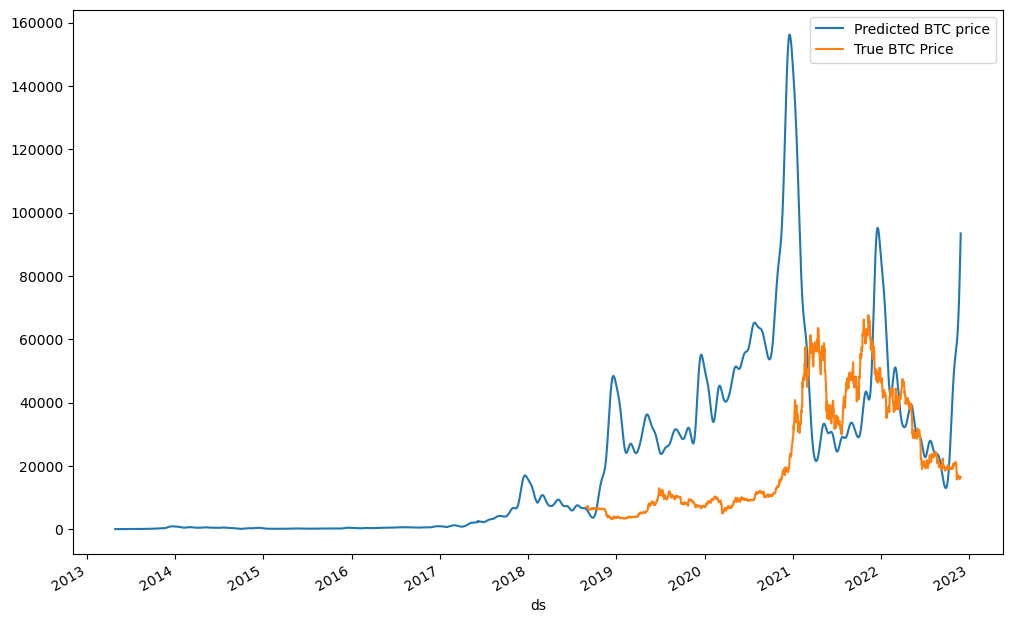

In [10]:
ax = forecast.plot(x='ds',y='yhat',label='Predicted BTC price',legend=True,figsize=(12,8))
test.plot(x='ds',y='y',label='True BTC Price',legend=True,ax=ax)

In [11]:
from statsmodels.tools.eval_measures import rmse

In [12]:
predictions = forecast.iloc[-dynamic_days:]['yhat']

In [13]:
rmse(predictions,test['y'])

36996.10390136933

In [14]:
# very large difference as it is roughly as equal half of the mean
test.mean()

C:\Users\sagap\AppData\Local\Temp\ipykernel_24644\3796774242.py:2: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



y    22244.296704
dtype: float64

In [15]:
# prophet has its own diagnostics. we need to define just as done below initial, period and horizon
from prophet.diagnostics import cross_validation,performance_metrics
from prophet.plot import plot_cross_validation_metric

In [16]:
# Initial 5 years training period
initial = 5 * 365
initial = str(initial) + ' days'
# Fold every 1 years
period = 1 * 365
period = str(period) + ' days'
# Forecast 1 year into the future
horizon = 365
horizon = str(horizon) + ' days'

In [17]:
#df_cv = cross_validation(m, initial=initial, period=period, horizon = horizon)

In [18]:
# thgis is the raw dataset that is returned via the above
#performance_metrics(df_cv)

In [19]:
# we can plt a specific metric of the above which shows that mse increases over time so up to 50 days we are ok
# more than that rmse increases a lot
#plot_cross_validation_metric(df_cv, metric='rmse');

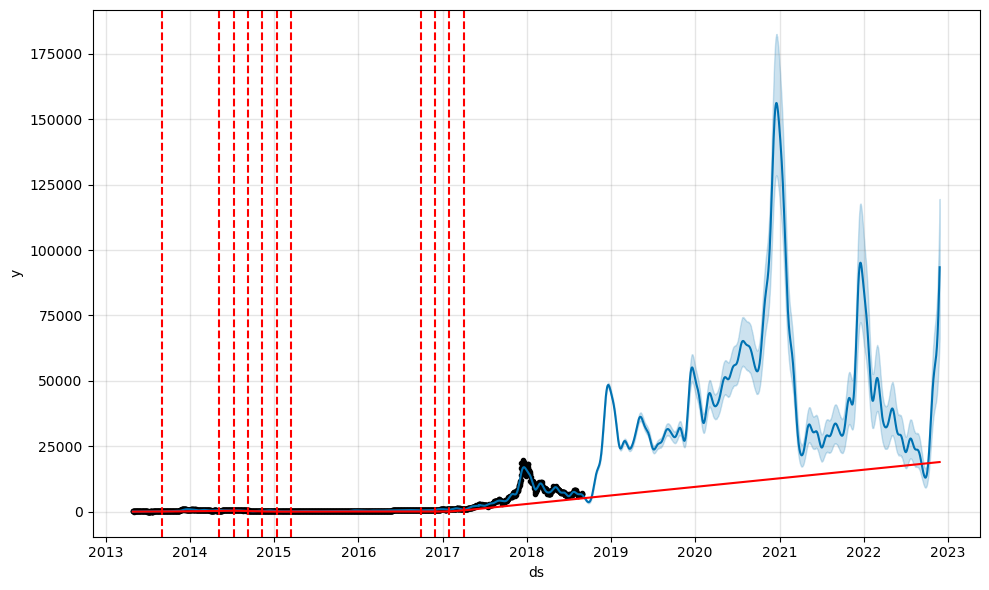

In [20]:
# to see the trend change points
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

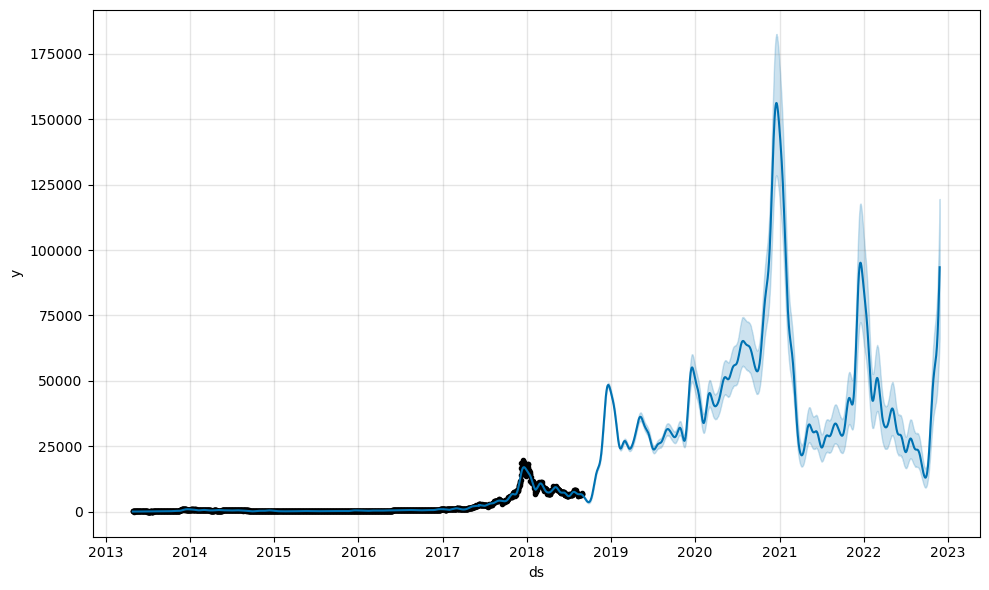

In [21]:
# we can use prophets own tools for plotting and analysis
import matplotlib.pyplot as plt
m.plot(forecast);
# plt.xlim('2014-01-01','2022-01-01') # we can use xlim to limit the data being plotted

In [22]:
# now I will include the test data in the training set and forecast 2 months in the future
m = Prophet(weekly_seasonality=False, seasonality_mode='multiplicative')
m.add_seasonality(name='4-year', period=1460, fourier_order=10)
m.fit(dfBTC)
# just a placeholder to hold our future predictions
# periods is how far in the future we want to predict and freq is the frequency of the data
# if we want monthly data then freq='MS'
future = m.make_future_dataframe(periods=dynamic_days,freq = 'D')

# to make predictions 
forecast = m.predict(future)


C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



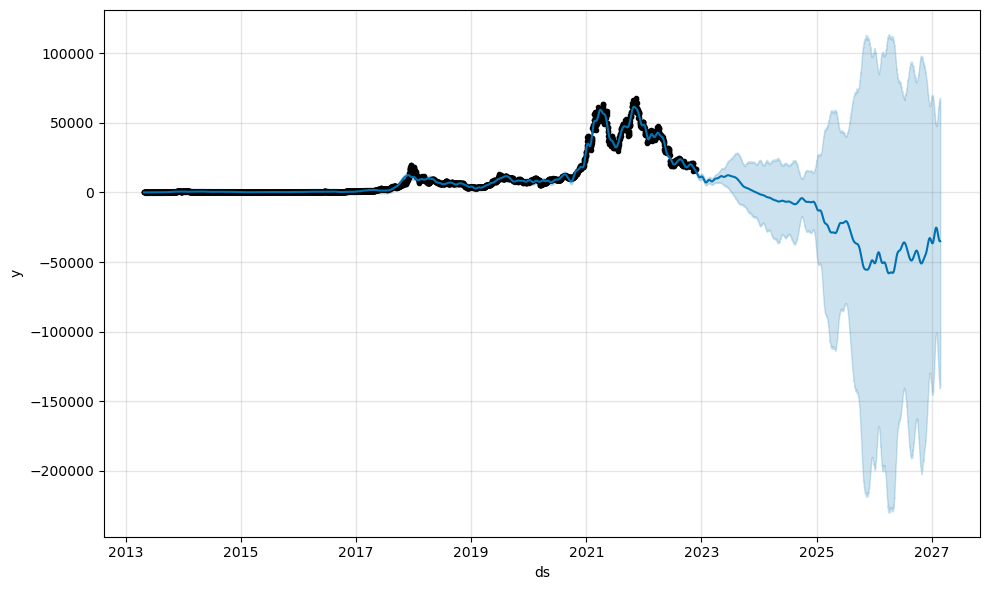

In [23]:
fig = m.plot(forecast)

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



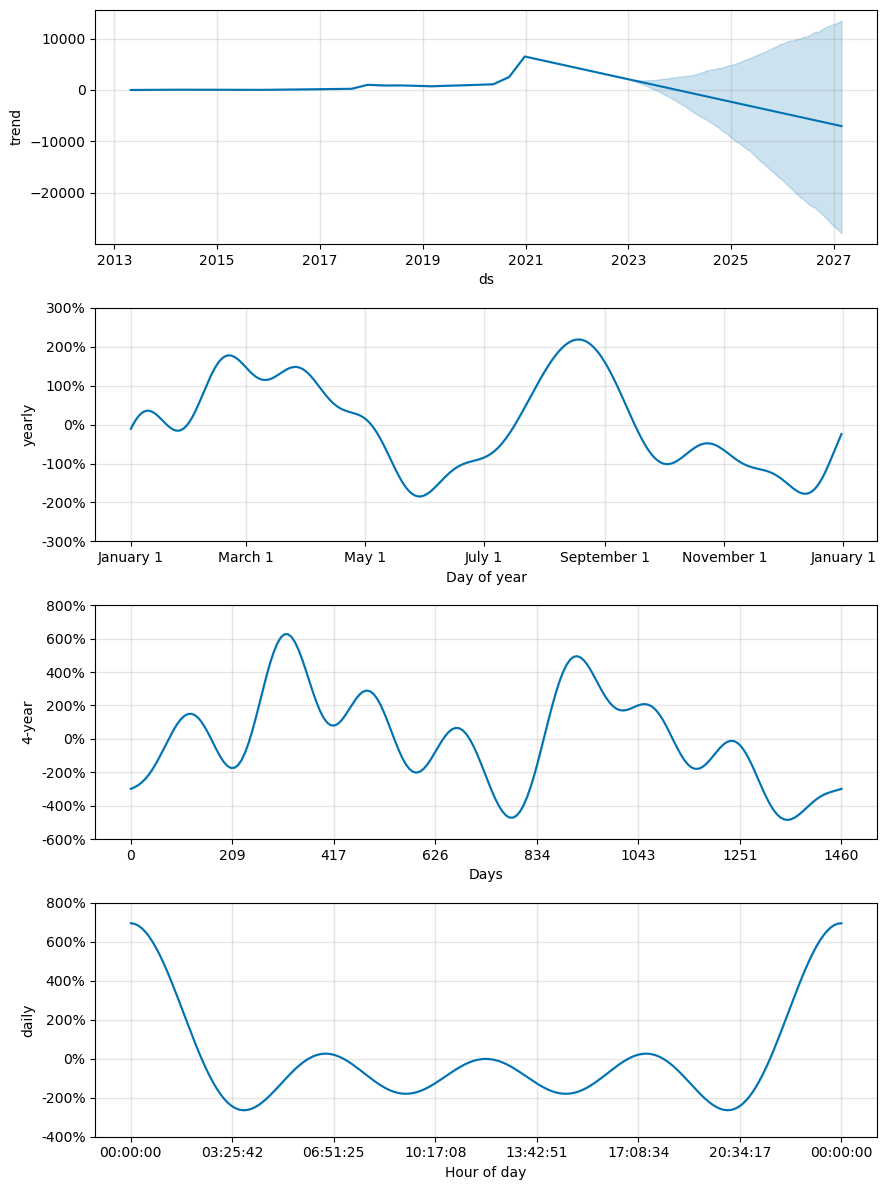

In [24]:
fig = m.plot_components(forecast)

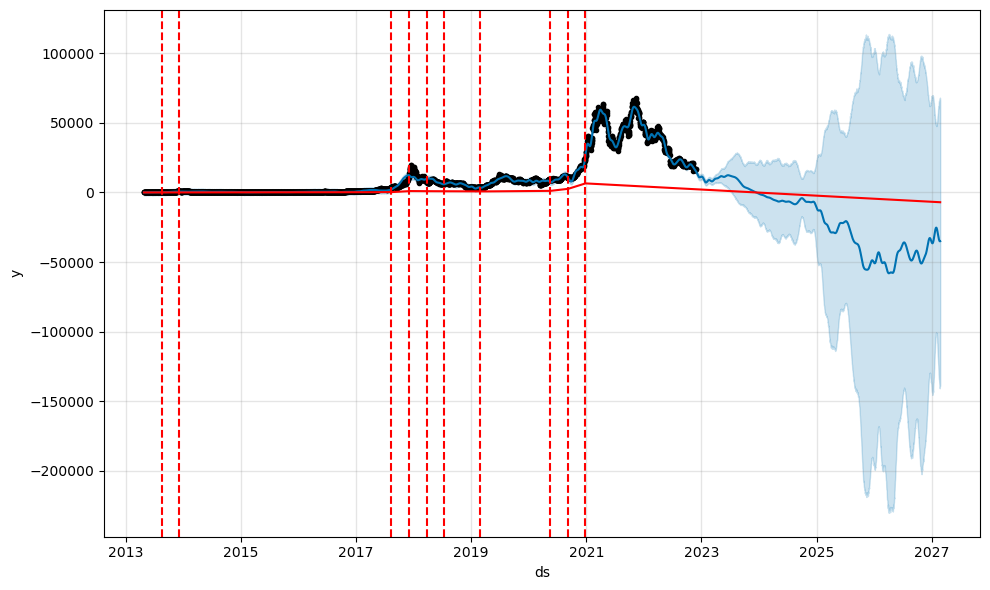

In [25]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [26]:
# final plot but with plotly
forecastPlotly = forecast.copy()
forecastPlotly['date'] = pd.to_datetime(forecastPlotly['ds'])
forecastPlotly = forecastPlotly.set_index('date')
forecastPlotly = forecastPlotly.drop(['ds'], axis=1)
forecastPlotly[['yhat_lower','yhat_upper', 'yhat']].iplot()

In [27]:
dfBTCActual['date'] = pd.to_datetime(dfBTCActual['Date'])
dfBTCActual = dfBTCActual.set_index('date')
dfBTCActual = dfBTCActual.drop(['Date'], axis=1)
result = forecastPlotly.join(dfBTCActual, how='outer')

In [34]:
result[['yhat_upper','Close']].iplot()

In [35]:
result[['yhat_upper', 'Close']].iplot(yaxis_type="log")